In [4]:
pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 2.5.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\pct77\anaconda3\lib\site-packages
Requires: opt-einsum, six, tensorboard, protobuf, typing-extensions, absl-py, termcolor, gast, numpy, flatbuffers, wheel, keras-nightly, astunparse, wrapt, google-pasta, tensorflow-estimator, h5py, keras-preprocessing, grpcio
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch 

from IPython.display import Image

from tqdm import tqdm

import IProgress 
from ipywidgets import IntProgress



In [10]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
cd yolov5

E:\1. Neharika\miniProject4\yolov5


In [3]:
import os
from random import choice

#arrays to store file names
imgs=[]
xmls=[]

#setup directory names
trainPath='E:/1. Neharika/miniProject5/dataset/images/train'
valPath='E:/1. Neharika/miniProject5/dataset/images/val'
crsPath='C:/Users/pct77/OneDrive/Desktop/dataset/'

train_ratio=0.8
val_ratio=0.2

totlImageCount=len(os.listdir(crsPath))/2

for(dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)
            
#counting range for cycles
countForTrain=int(len(imgs)*train_ratio)
countForVal=int(len(imgs)*val_ratio)
print("Training images are:", countForTrain)
print("Validation images are:", countForVal)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/pct77/OneDrive/Desktop/dataset/'

In [3]:
import shutil
import os
trainImagePath='E:/1. Neharika/miniProject5/dataset/images/train'
trainLabelPath='E:/1. Neharika/miniProject5/dataset/labels/train'
valImagePath='E:/1. Neharika/miniProject5/dataset/images/val'
valLabelPath='E:/1. Neharika/miniProject5/dataset/labels/val'

#cycle for train dir
for x in range (countForTrain):
    fileJpg=choice(imgs)
    fileXml=fileJpg[:-4]+'.txt'
    
    shutil.copy(os.path.join(crsPath,fileJpg), os.path.join(trainImagePath,fileJpg))
    shutil.copy(os.path.join(crsPath,fileXml), os.path.join(trainLabelPath,fileXml))
    
    imgs.remove(fileJpg)
    xmls.remove(fileXml)
    
for x in range (countForVal):
    fileJpg=choice(imgs)
    fileXml=fileJpg[:-4]+'.txt'
    
    shutil.copy(os.path.join(crsPath,fileJpg), os.path.join(valImagePath,fileJpg))
    shutil.copy(os.path.join(crsPath,fileXml), os.path.join(valLabelPath,fileXml))
    
    imgs.remove(fileJpg)
    xmls.remove(fileXml)


shutil.move(crsPath, valPath)
    

NameError: name 'countForTrain' is not defined

In [4]:
!python train.py --img 600 --batch 10 --epochs 3 --data coco128.yaml --weights yolov5x.pt --nosave --cache 

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5

train: weights=yolov5x.pt, cfg=, data=coco128.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=3, batch_size=10, imgsz=600, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
fatal: cannot change to 'E:\1.': No such file or directory
YOLOv5  2022-7-15 Python-3.9.7 torch-1.11.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shea

In [23]:
!python detect.py --source a.jpg --weights runs/train/exp3/weights/best.pt

detect: weights=['runs/train/exp3/weights/best.pt'], source=a.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to 'E:\1.': No such file or directory
YOLOv5  2022-7-15 Python-3.9.7 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 E:\1. Neharika\miniProject5\yolov5\a.jpg: 448x640 Done. (0.289s)
Speed: 2.0ms pre-process, 288.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp12


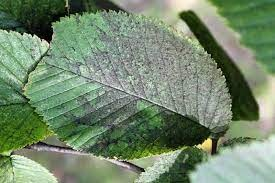

In [5]:
Image(filename='runs/detect/exp12/a.jpg', width=340)

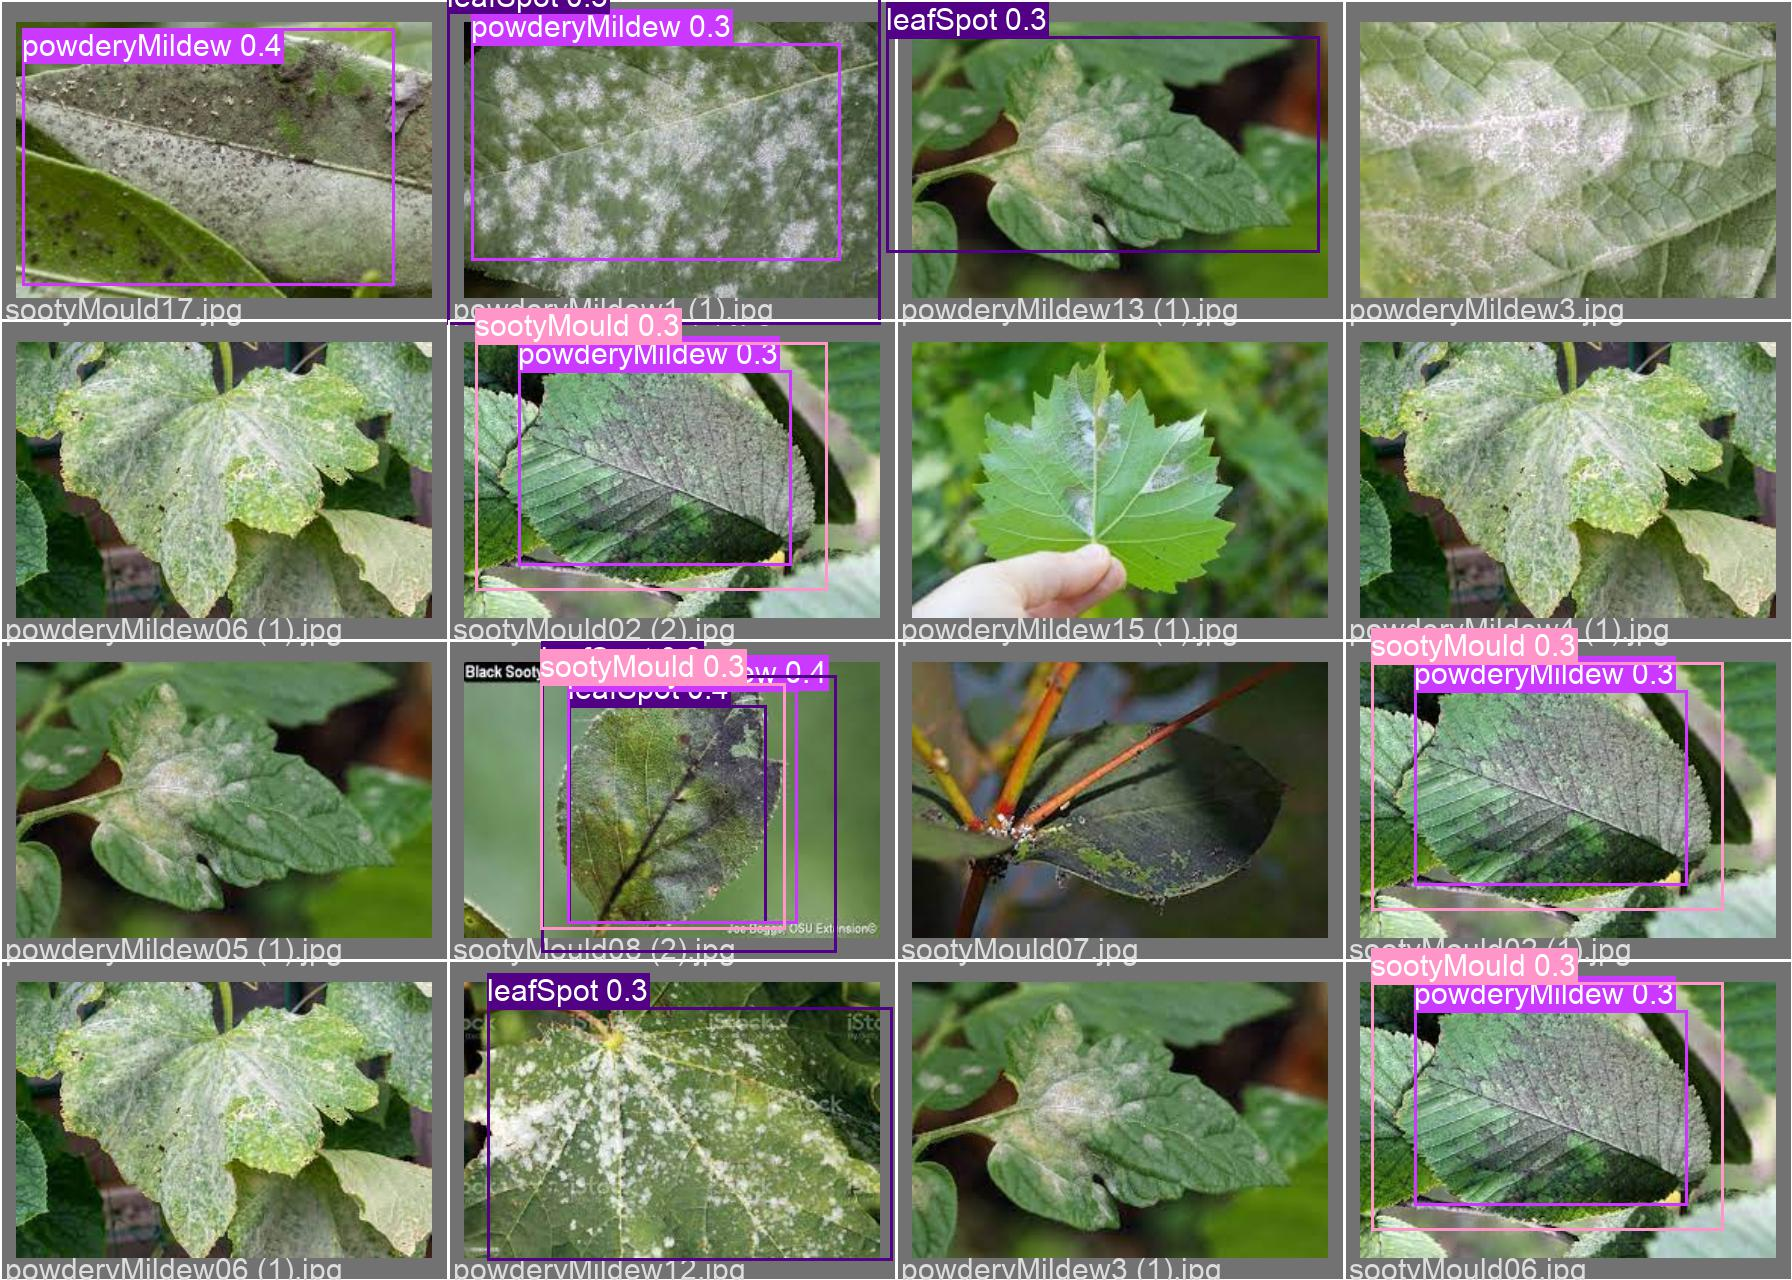

In [6]:
Image(filename='runs/train/exp/val_batch1_pred.jpg', width=1000)

In [7]:
!python detect.py --source runs/train/exp/car.jpg --weights yolov5x.pt

detect: weights=['yolov5x.pt'], source=runs/train/exp/car.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to 'E:\1.': No such file or directory
YOLOv5  2022-7-15 Python-3.9.7 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
image 1/1 E:\1. Neharika\miniProject4\yolov5\runs\train\exp\car.jpg: 640x480 1 car, Done. (4.049s)
Speed: 242.3ms pre-process, 4049.2ms inference, 193.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp13


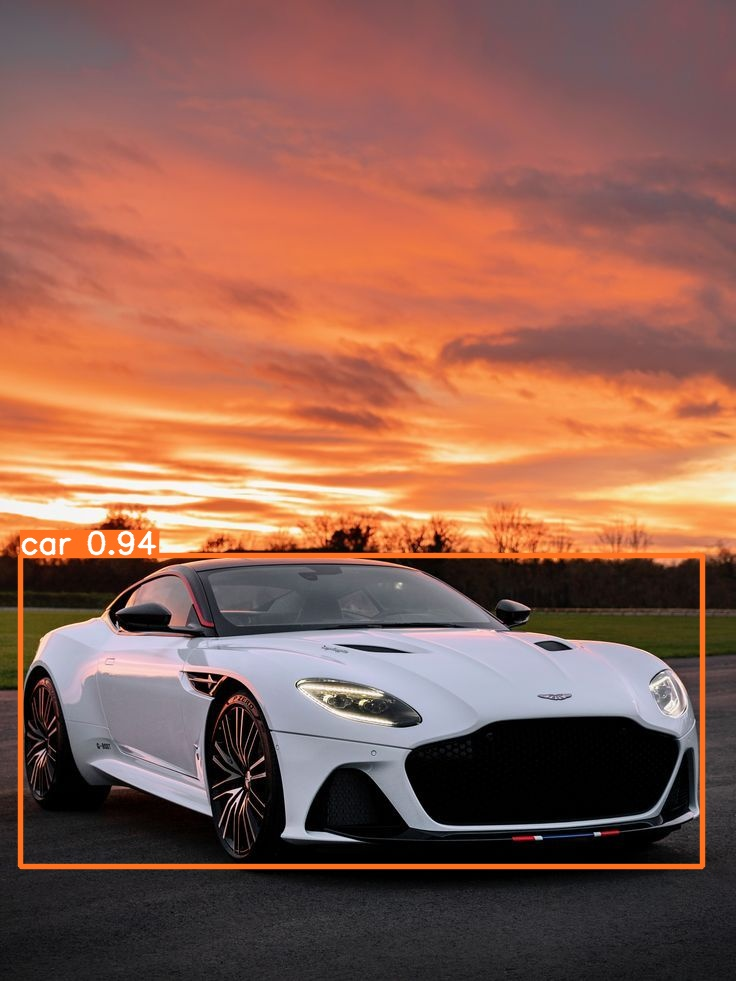

In [19]:
Image(filename='runs/detect/exp9/car.jpg', width=360)